In [6]:
import os

os.system('jupyter nbconvert --to html HW1.ipynb')

0

In [1]:
# import libraries

import cvxpy as cp
import numpy as np  
import matplotlib.pyplot as plt

print ("finished loading libraries")



finished loading libraries


# 1. Problem 1
Consider the following optimization problem min{x^2 + y^2 : x + 3y ≥ 6; x + y ≥ 4; x ≥ 0; y ≥ 0} 

Plot the feasible region of this problem with the feasible area shaded. 

Draw (in dashed lines) the contours of the objective function. Based on your drawing, guess an optimal solution and the optimal objective value of this problem.

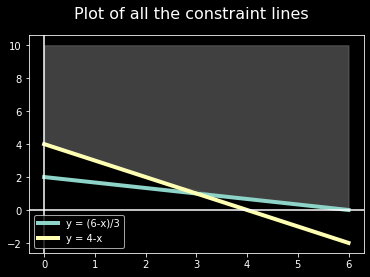

In [2]:
# def graph(formula, x_range = range (-10,11)):  
#     x = np.array(x_range)  
#     y = eval(formula)
#     plt.plot(x, y)  

fig = plt.figure()
fig.suptitle('Plot of all the constraint lines', fontsize=16)
x = np.linspace(0,6,6)
y1 = (6-x)/3
y2 = 4-x
plt.plot(x,y1,lw = 4)
plt.plot(x,y2,lw = 4)
plt.axhline(y = 0, linestyle = "-")
plt.axvline(x = 0, linestyle = "-")
plt.legend(['y = (6-x)/3', 'y = 4-x'], loc='lower left')

y_zero = np.zeros(x.shape[0])
ymax = np.maximum(y1,y2)
ymax = np.maximum(ymax,y_zero)
plt.fill_between(x, ymax, 10,color = "grey", alpha = 0.5)
plt.show() 




Since we want to minimize the x^2 and y^2, the points to consider will be along the bottom line of the shaded area. The y value of the bottom of the shaded area is stored previous in the variable ymax.

Plot the circles of the objective function at various point.

Although caption is not added but the smallest circle correspond to x = 2 and y = 2.

when x = 0.00 and y = 4.00, value of the function = 16.00
when x = 0.67 and y = 3.33, value of the function = 11.56
when x = 1.33 and y = 2.67, value of the function = 8.89
when x = 2.00 and y = 2.00, value of the function = 8.00
when x = 2.67 and y = 1.33, value of the function = 8.89
when x = 3.33 and y = 0.89, value of the function = 11.90
when x = 4.00 and y = 0.67, value of the function = 16.44
when x = 4.67 and y = 0.44, value of the function = 21.98
when x = 5.33 and y = 0.22, value of the function = 28.49
when x = 6.00 and y = 0.00, value of the function = 36.00


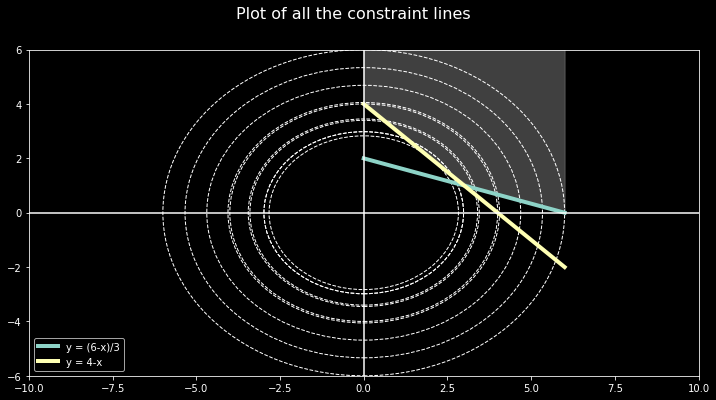

In [3]:

fig2 = plt.figure(figsize = (12,6))
fig2.suptitle('Plot of all the constraint lines', fontsize=16)
x = np.linspace(0,6,10)
y1 = (6-x)/3
y2 = 4-x
plt.plot(x,y1,lw = 4)
plt.plot(x,y2,lw = 4)
plt.axhline(y = 0, linestyle = "-")
plt.axvline(x = 0, linestyle = "-")
plt.legend(['y = (6-x)/3', 'y = 4-x'], loc='lower left')

y_zero = np.zeros(x.shape[0])
ymax = np.maximum(y1,y2)
ymax = np.maximum(ymax,y_zero)
plt.fill_between(x, ymax, 10,color = "grey", alpha = 0.5)

fig2 = plt.gcf()
ax = fig2.gca()
ax.set_xlim([-10,10])
ax.set_ylim([-6,6])

legend_label = [] # createa additional legend label

for i in (range(0,x.shape[0])):
    cx = x[i]
    cy = ymax[i]
    r = (cx**2 + cy**2)**0.5

    print ("when x = {:.2f} and y = {:.2f}, value of the function = {:.2f}".format(cx,cy,cx**2 + cy**2))
    
    legend_label.append("({:.2f}, {:.2f})".format(cx,cy))

    ax.add_artist(plt.Circle((0, 0), r , fill = False, linestyle = "--"))



 Another way of plotting the contour, which I think is better. The minimal value  of objective function can be seen at (2,2)

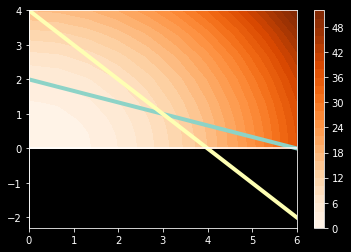

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

def cal_sum (x,y):
    return (np.add(np.square(x), np.square(y)))

x = np.linspace(0,6,10)
y1 = (6-x)/3
y2 = 4-x
plt.plot(x,y1,lw = 4)
plt.plot(x,y2,lw = 4)
plt.axhline(y = 0, linestyle = "-")
plt.axvline(x = 0, linestyle = "-")

X,Y = np.meshgrid(x,ymax)
Z = cal_sum(X,Y)

plt.contourf(X,Y,Z,30,cmap=cm.Oranges)
plt.colorbar()
plt.show()


Estimate the x^2 + y^2 function by numerical method by calculating the the object function with 100 different x value ranging from x = 0 to x = 6

In [5]:
x = np.linspace(0,6,100)
y1 = (6-x)/3
y2 = 4-x
y_zero = np.zeros(x.shape[0])
ymax = np.maximum(y1,y2)
ymax = np.maximum(ymax,y_zero)

sum = np.add(np.square(x), np.square(ymax))

print ("The minimum value of the objective is: ", np.min(sum))

min_index = np.argmin(sum)

print ("At the minimum value, x is: ", x[min_index])
print ("At the minimum value, y is: ", ymax[min_index])





The minimum value of the objective is:  8.0
At the minimum value, x is:  2.0
At the minimum value, y is:  2.0


# 2. Problem 2

Recall the maximum volume box from Module 1, Lesson 1. Solve the following problem using basic calculus: max {x(1 − 2x)^2 : 0 ≤ x ≤ 1/2}

What is the optimal solution and the optimal objective value?

First, take the derivative of the objective function using sympy

In [6]:
import sympy as sp  

x = sp.Symbol('x')
y = x*(1-2*x)**2

yprime = y.diff(x)
print ("The 1st derivative of the objective function is :")
print (yprime)

yprime_prime = yprime.diff(x)

print ("\n")
print ("The 2nd derivative of the objective function is :")
print (yprime_prime)

# then solve the equation by setting the 1st derivative ti zero

from sympy.solvers import solve

x = sp.Symbol('x')
x_critical = solve(yprime,x)

print ("\n")
print ("The critical value after setting 1st derivative to 0 is:")
print (x_critical)


# plug in the critical value to the 2nd derivative

for val in x_critical:
    print ("\n")
    print ("when x = {}, y = {}, the value of 2nd derivative is {}".
    format(val, y.subs(x,val),  yprime_prime.subs(x,val))
    )



The 1st derivative of the objective function is :
x*(8*x - 4) + (1 - 2*x)**2


The 2nd derivative of the objective function is :
24*x - 8


The critical value after setting 1st derivative to 0 is:
[1/6, 1/2]


when x = 1/6, y = 2/27, the value of 2nd derivative is -4


when x = 1/2, y = 0, the value of 2nd derivative is 4


 When x = 1/6, it is within the limits of the constraints and negative value of second derivative shows that the object function is at local maxima when x = 1/6

# 3. Problem 3
Recall the portfolio optimization problem solved in Module 2, Lesson 3. Collect the prices of MSFT, V, and WMT from the last 24 months. Use the code used in the lesson (this will be provided) to solve the exact same portfolio problem using the new data. Compare and contrast your solution to the one in the lesson.

In [7]:
# import libraries
import pandas as pd
import numpy as np
import cvxpy as cp



## 3.1 use original data

In [8]:
# read monthly_prices.csv for the old data
mp = pd.read_csv("monthly_prices_old.csv",index_col=0)
display (mp)

# compute monthly returns using using the pct_change function in pandas
# https://stackoverflow.com/questions/13385663/calculating-returns-from-a-dataframe-with-financial-data

mr = mp.pct_change()[1:]

# convert monthly return data frame to a numpy matrix
return_data = mr.as_matrix().T

# compute mean return
r = np.asarray(np.mean(return_data, axis=1))

# covariance
C = np.asmatrix(np.cov(return_data))

# get symbol names
symbols = mr.columns

# print out expected return and std deviation
print ("----------------------")
for j in range(len(symbols)):

    print ('{}: Exp ret = {:.4f}%, Risk = {:.4f}'.format(
         symbols[j],r[j]*100, C[j,j]**0.5)
    )
   
# set up optimization model
n = len(symbols)
x = cp.Variable(n)
req_return = 0.02
ret = r.T*x
risk = cp.quad_form(x, C)


objective = cp.Minimize(risk)
constraints = [cp.sum(x) == 1, ret >= req_return, x >=0]

prob = cp.Problem(objective, constraints)

# solve problem and write solution
try:
    prob.solve()

    # after the .solve() method 
    # the value of x will change since it is a cp.Variable object

    print ("----------------------")
    print ("Optimal portfolio")
    print ("----------------------")
    for s in range(len(symbols)):
        print ("stock {}: {:.2f}%".format(symbols[s], x.value[s]*100))

    print ("----------------------")

    print ('Exp return = {:.4f}%'.format(ret.value*100))
    print ('risk    = {:.4f}'.format((risk.value)**0.5))

    print ("----------------------")
except:
    print ('Error')



,MSFT,V,WMT
1,44.259998,69.660004,64.839996
2,52.639999,77.580002,57.240002
3,54.349998,79.010002,58.840000
4,55.480000,77.550003,61.299999
5,55.090000,74.489998,66.360001
6,50.880001,72.389999,66.339996
7,55.230000,76.480003,68.489998
8,49.869999,77.239998,66.870003
9,53.000000,78.940002,70.779999
10,51.169998,74.169998,73.019997


----------------------
MSFT: Exp ret = 2.4611%, Risk = 0.0580
V: Exp ret = 1.8237%, Risk = 0.0428
WMT: Exp ret = 0.9066%, Risk = 0.0445
----------------------
Optimal portfolio
----------------------
stock MSFT: 58.28%
stock V: 20.43%
stock WMT: 21.29%
----------------------
Exp return = 2.0000%
risk    = 0.0383
----------------------
D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


## 3.2 Use new data

In [9]:
# https://www.quora.com/Using-Python-whats-the-best-way-to-get-stock-data
# load the yahoo finance library
import yfinance as yf
import matplotlib.pyplot as plt

start = "2017-08-26"
end = "2019-08-26"

MSFT = yf.download("MSFT", start, end)
V = yf.download("V", start, end)
WMT = yf.download("WMT", start, end)


[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


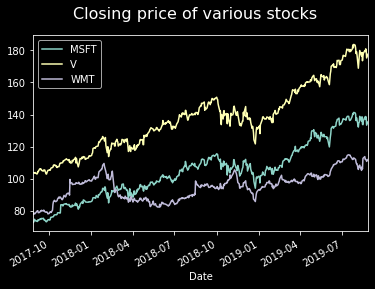

In [10]:
# Plot the close prices

fig3 = plt.figure()
fig3.suptitle('Closing price of various stocks', fontsize=16)
MSFT.Close.plot()
V.Close.plot()
WMT.Close.plot()

plt.legend(["MSFT", "V", "WMT"], loc='upper left')
plt.show()


In [11]:
# Calculate return

MSFT_r = MSFT["Close"].resample('M').ffill().pct_change()[1:]
V_r = V["Close"].resample('M').ffill().pct_change()[1:]
WMT_r = WMT["Close"].resample('M').ffill().pct_change()[1:]

DF = pd.concat([MSFT_r,V_r,WMT_r], axis = 1)
DF.columns = ["MSFT", "V", "WMT"]


In [12]:
# convert monthly return data frame to a numpy matrix
return_data = DF.values.T

# compute mean return
r = np.asarray(np.mean(return_data, axis=1))

# covariance
C = np.asmatrix(np.cov(return_data))

# get symbol names
symbols = DF.columns

# print out expected return and std deviation
print ("----------------------")
for j in range(len(symbols)):

    print ('{}: Exp ret = {:.4f}%, Risk = {:.4f}'.format(
         symbols[j],r[j]*100, C[j,j]**0.5)
    )
   
# set up optimization model
n = len(symbols)
x = cp.Variable(n)
req_return = 0.02
ret = r.T*x
risk = cp.quad_form(x, C)


objective = cp.Minimize(risk)
constraints = [cp.sum(x) == 1.0, ret >= req_return, x >=0]

prob = cp.Problem(objective, constraints)

# solve problem and write solution
try:
    prob.solve()

    # after the .solve() method 
    # the value of x will change since it is a cp.Variable object

    print ("----------------------")
    print ("Optimal portfolio")
    print ("----------------------")
    for s in range(len(symbols)):
        print ("stock {}: {:.2f}%".format(symbols[s], x.value[s]*100))

    print ("----------------------")

    print ('Exp return = {:.4f}%'.format(ret.value*100))
    print ('risk    = {:.4f}'.format((risk.value)**0.5))

    print ("----------------------")
except:
    print ('Error')


----------------------
MSFT: Exp ret = 2.6440%, Risk = 0.0540
V: Exp ret = 2.3674%, Risk = 0.0442
WMT: Exp ret = 1.6948%, Risk = 0.0609
----------------------
Optimal portfolio
----------------------
stock MSFT: -0.00%
stock V: 73.38%
stock WMT: 26.62%
----------------------
Exp return = 2.1884%
risk    = 0.0411
----------------------


 Portfolio with original data:
 <br>
 MSFT: 58.28%
 <br>
 V: 20.43%
 <br>
 WMT: 21.29%
 <br>
 Portfolio with new data:
 <br>
 MSFT: -0.00%
 <br>
 V: 73.38%#
 <br>
 WMT: 26.62%
 <br>

For the new portfolio, more weight was put on V and less weight is put on WMT. The new portfolio can generate higher expected return even though both optmization route have required return rate of 0.02. The new portfolio also showed higher risk